# Basic Web Scraping Example

## About
This example contains explanations and code used to perform a basic Web Scraping task. This example will use Python, as it is one of the most popular languages used for Web Scraping.

In this example, we will go to an IMDb webpage and scrape some basic data about a film. This knowledge can then be applied to accomplish countless other similar tasks.

**NOTE:** This Jupyter Notebook will be composed of intermittent code and explanations (in markdown). If you just simply want the raw code example, see the bottom of the Jupyter Notebook.

## Install Requirements
First things first, we need to install all of the Python packages we need. In our case, we need the `requests` and `BeautifulSoup` packages. If you don't already have them installed, please go to a terminal in your desired Python Environment and execute the following commands:
- `pip install requests`
- `pip install beautifulsoup4`

# Getting Started
Now that we have all of our packages installed, let's import them:

In [17]:
import requests
from bs4 import BeautifulSoup

The next step we need to do to get started is to determine which webpage we want to scrape. For this example, let's scrape some data from IMDb. IMDb is one of the world's most popular and authoritative websites for movie, TV, and celebirty content.

Let's say that we want to scrape some basic data about the film *A Ghost Story*, which was directed by David Lowery in 2017. The URL for this film is: https://www.imdb.com/title/tt6265828/

So let's define it as a variable:

In [18]:
# define the target webpage
url = "https://www.imdb.com/title/tt6265828/"

# Performing the Scrape

When we use the word *"scrape"* in the context of Web Scraping, we're referring to the process of getting the data stored on a webpage and saving it into a workable format that we can process/use. In order to do this, we need to send an HTTP GET request to our chosen URL (webpage).

Before we perform our first scrape, however, we need to first define our User-Agent string. A User-Agent string is a part of the HTTP request header that helps identify the client software (and version), operating system, and sometimes even the device that is used for sending requests to the server. In other words, it's a way for the server to identify you and how you are sending a request to the server. It is important to note that the User-Agent string is not necessarily unique to you, though. Many users with the same browser and operating system will likely have the same User-Agent string.

So how do we get our User-Agent string? There are many ways to do this, but one simple way is to go to https://www.google.com and type *"What is my User-Agent string?"*

Then copy the text found at the location below:

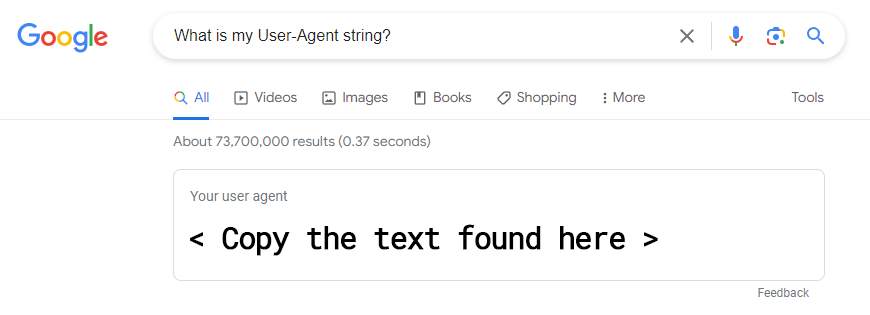

Now let's save that User-Agent string into a variable. Copy your specific User-Agent string and paste it into the following variable. For this example, we will just use a generic User-Agent string like so:

In [19]:
# define the user-agent string
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246'
}

Now that we have our User-Agent string defined, we can now perform the actual scrape (using the URL and User-Agent string). Here is how we do it:

In [20]:
# perform the scrape on the target url, provide user-agent string
response = requests.get(url, headers=headers)

Now that we have sent the HTTP GET request to our URL, we need to make sure that it returned valid data.

This can be done by checking the `status_code` of the response variable we just created.
- If the returned `status_code` is 200, it means that the scrape was successful.
- If the returned `status_code` is not equal to 200, then it means that something might have gone wrong (or there is more information about your request). You can go to [this website](https://www.restapitutorial.com/httpstatuscodes.html) for deeper explanations of the specific code you're receiving.

In order to check the `status_code` of the scrape we just performed (to ensure it returned valid data), we can do the following:

In [21]:
# ensure the scrape was performed successfully (valid response)
if response.status_code == 200:
    print("The webpage was scraped successfully!")
else:
    raise RuntimeError(f"Something may have gone wrong while scraping! The returned status code was: {response.status_code}")

The webpage was scraped successfully!


Now that we know that the scrape returned with valid data, we need to pass the webpage's data into BeautifulSoup for parsing. Here's how we do this:

In [22]:
# pass the webpage data into beautifulsoup for parsing
soup = BeautifulSoup(response.text, 'html.parser')

# Extracting Desired Data

Let's suppose that we want to extract 5 pieces of data about *A Ghost Story* from the webpage:
1. Title
2. Release Year
3. MPA Rating
4. Runtime
5. IMDb Score

## Extracting the Title

The first piece of data we want to extract from the webpage is the film's title. We know that the title of the film is *"A Ghost Story"* in this case, but we won't always know the data before we extract it from a webpage.

So how do we extract the title from the webpage's parsed data? Well, we first have to understand the webpage's structure. Where is the title stored on the page? We find this out by studying the HTML structure of the page. Let's look at this step-by-step.

1. Open the webpage. It should look something like this:

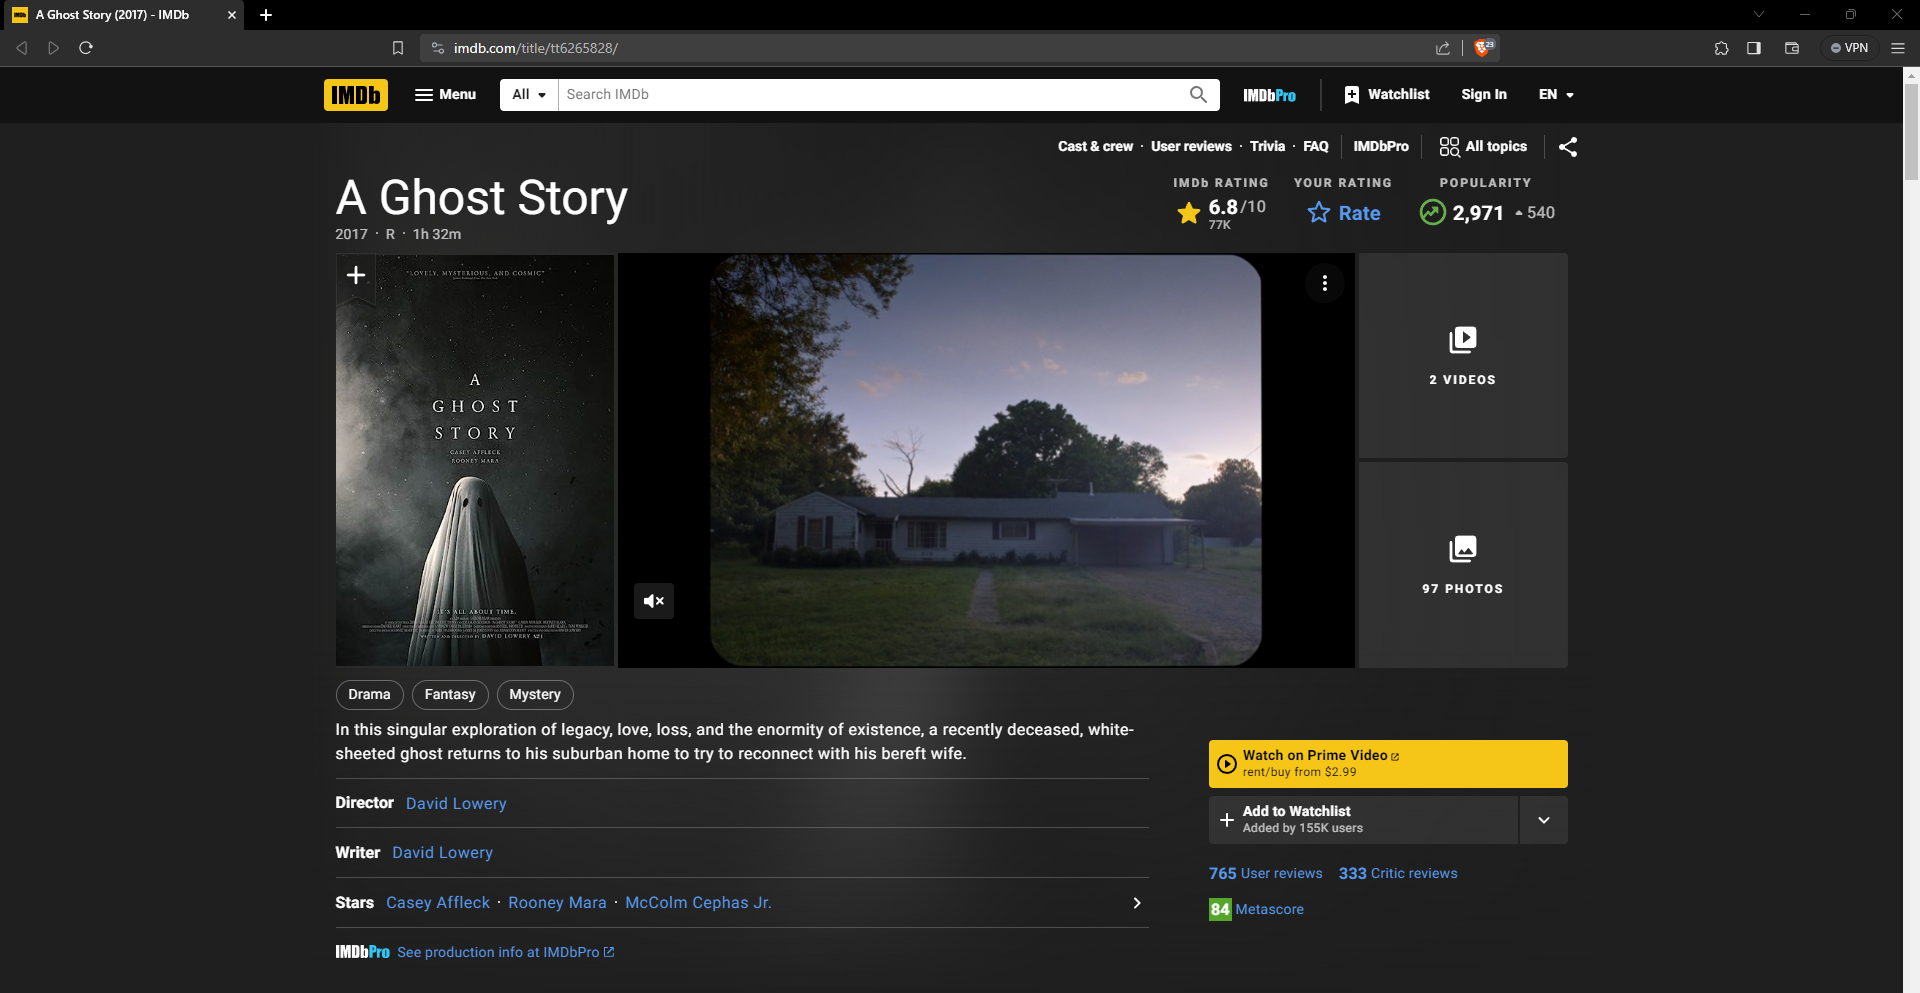

2. Open the Developer Tools view of your browser (usually opened with F12). You should now see the HTML hierarchy of the webpage inside of that window like this (on the right):

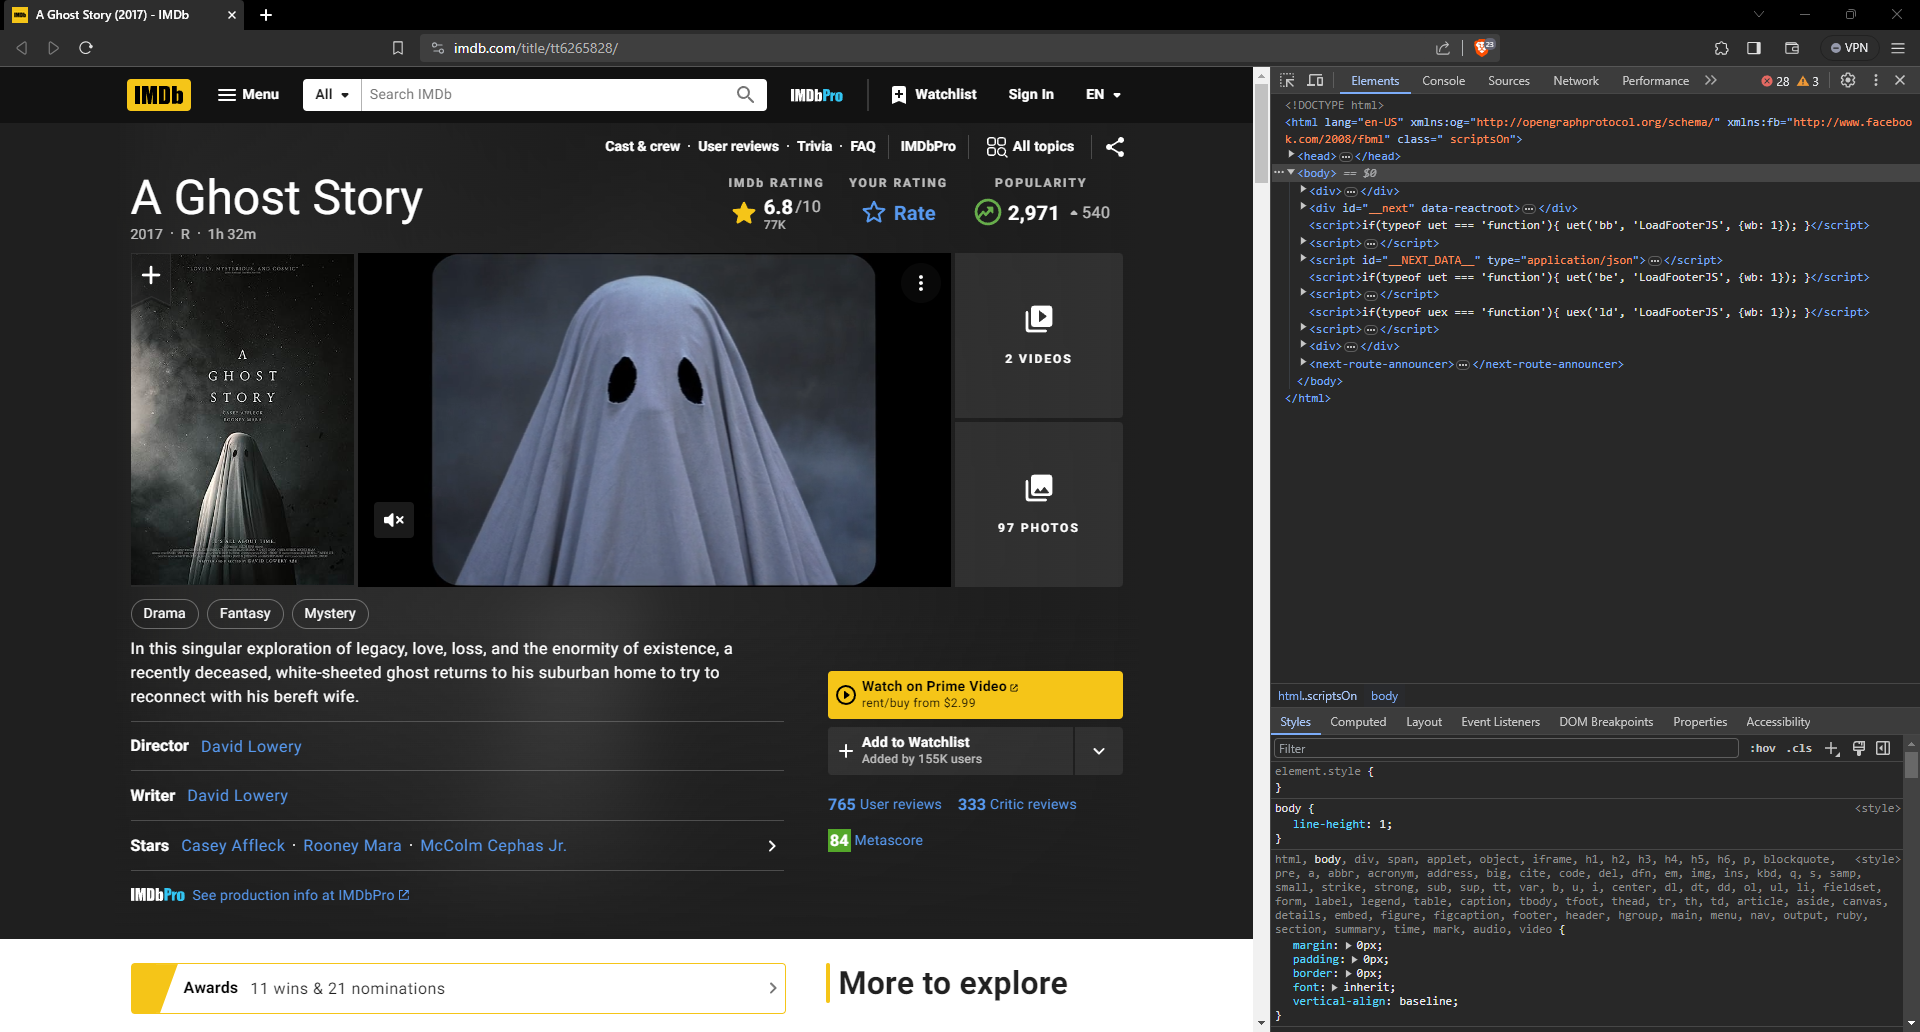

3. Now scroll your mouse over the HTML hierarchy and you'll see parts of the webpage begin to highlight. These highlighted areas correspond to the HTML tree that you're moving your mouse over. Begin drilling down into the webpage structure by clicking the dropdown arrow next to each element. Drill down to the element you want by continuously clicking on the dropdown arrow that keeps your desired data highlighted in the webpage. Keep doing this until you have reached the smallest HTML element you can while your desired data remains highlighted.

    - In the case of the film's title on this webpage, you can see that it's stored in a `span` with the `class` name *"sc-afe43def-1 fDTGTb"*. When the mouse is hovering over this element in the HTML hierarchy, you can see the title highlighted on the page like so:

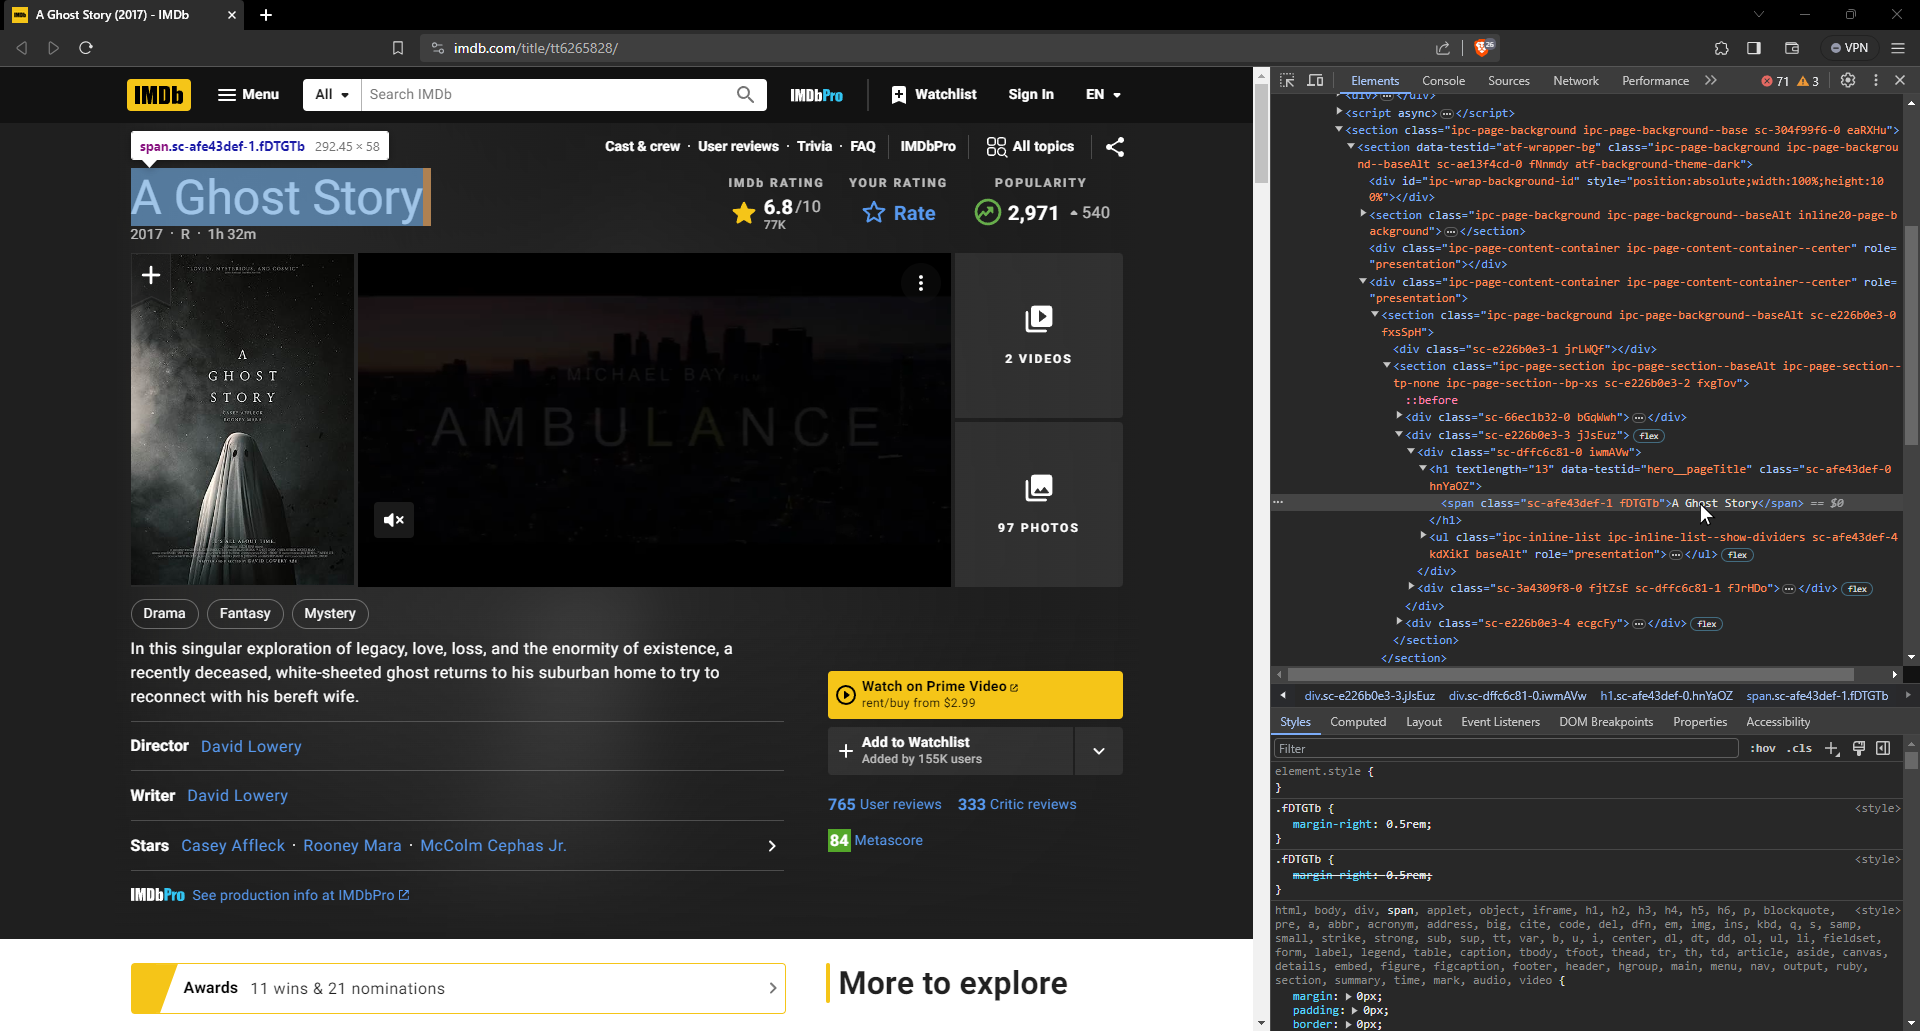

4. Now that we know that the film's title is stored in a `span` with the `class` name *"sc-afe43def-1 fDTGTb"*, we can use BeautifulSoup's `find()` function to extract the title from the webpage. Here's how to do this:

In [23]:
# extract the span containing the film's title
title_span = soup.find("span", class_="sc-afe43def-1 fDTGTb")

5. We now have the `span` from the webpage that contains the film's title saved into a variable named `title_span`. We can now extract the film's title which is stored in the `.text` field of the `title_span` variable. So let's extract the film's title from the `title_span` variable and print it out:

In [24]:
# extract the film's title from the span
film_title = title_span.text

# print the film's title (extracted from the webpage)
print(film_title)

A Ghost Story


## Extracting the Release Year, MPA Rating, and Runtime

Sometimes, when extracting data from a webpage, we will notice that our desired data is compartmentalized into some sort of structure. Let's look at an example of this.

We have determined that we want to extract the Release Year, MPA Rating, and Runtime of the film from *A Ghost Story*'s IMDb webpage. If you follow the steps outlined in the previous *"Extracting the Title"* section and navigate through the HTML tree until you narrow down the location of the Release Year, MPA Rating, and Runtime data, you will see that all three of these pieces of data are stored inside of an Unordered List (or *"ul"*) on the page like so:

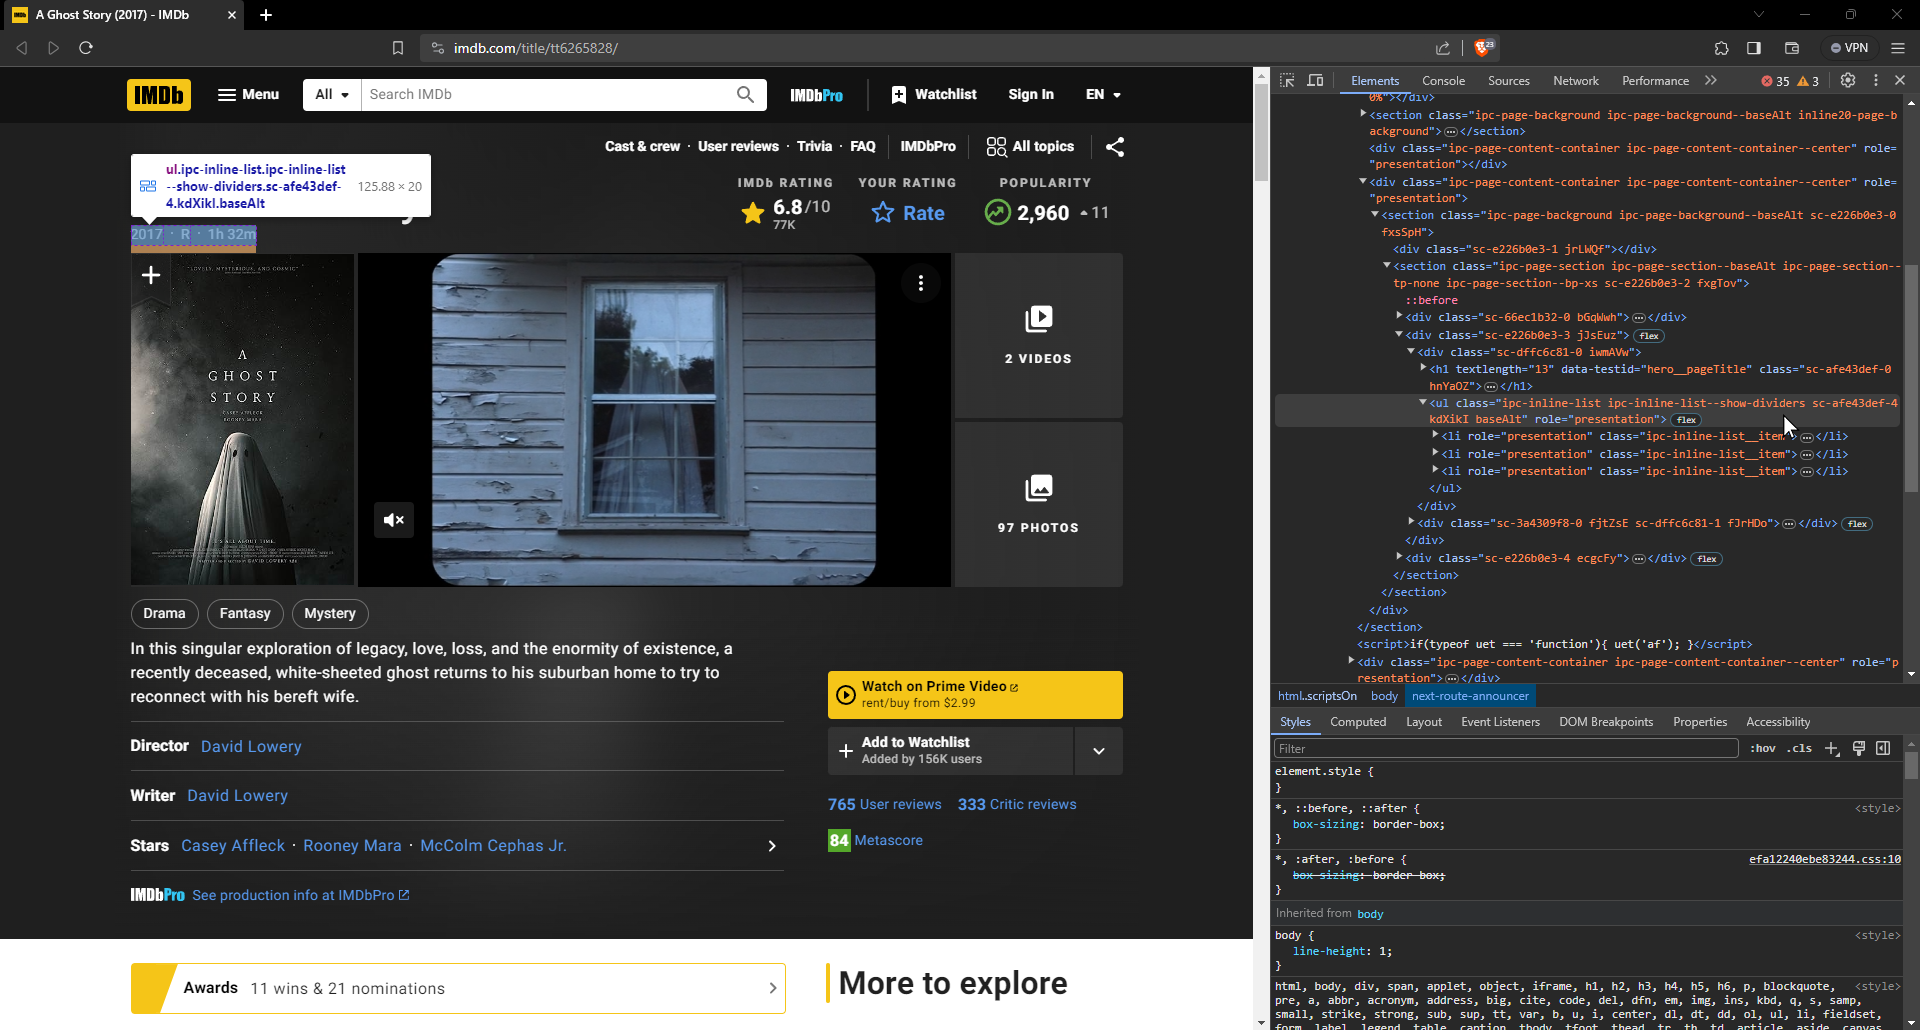

We now know that the film's Release Year, MPA Rating, and Runtime are all stored in an Unordered List (*ul*) with the `class` name *"ipc-inline-list ipc-inline-list--show-dividers sc-afe43def-4 kdXikI baseAlt"*, which means we can extract this Unordered List (*ul*) from the webpage like this:

In [25]:
# extract the unordered list (ul) containing the film's release year, mpa rating, and runtime from the webpage
raw_ul = soup.find("ul", class_="ipc-inline-list ipc-inline-list--show-dividers sc-afe43def-4 kdXikI baseAlt")

We have now extracted the Unordered List (*ul*) containing our desired information. It contains 3 pieces of data:
1. Release Year
2. MPA Rating
3. Runtime

If you look at the previous screenshot again, you'll see that each of these three pieces of data are stored inside of a List Item (or *"li"*) inside of the Unordered List (*ul*) we just extracted. This means that we need to use BeautifulSoup's `find_all()` function to search for all List Items (*li*) inside of the `raw_ul` Unordered List (*ul*) like this:

In [26]:
# extract all of the list items (li) from the raw_ul unordered list (ul)
list_items = raw_ul.find_all("li")

Now we can see that the `list_items` variable is a Python list that contains 3 elements, each of which containing a piece of data we want:

In [27]:
# print the length (count) of the list items (li) we just extracted
print(len(list_items))

3


So now, let's save off the data we want from the `list_items` variable. Note that we have to use the `.text` field on each item in order to get the clean, formatted data just like it appears on the webpage. We do this step like this:

In [28]:
# save the desired extracted data into corresponding variables
film_release_year = list_items[0].text
film_MPA_rating = list_items[1].text
film_runtime = list_items[2].text

## Extracting the IMDb Score

Following the steps outlined in the *"Extracting the Title"* section above, we can navigate through the HTML tree until we narrow down the location of the IMDb score. Doing this, we can see that the IMDb score is stored in a `span` with the `class` name *"sc-bde20123-1 iZlgcd"*, as seen here:

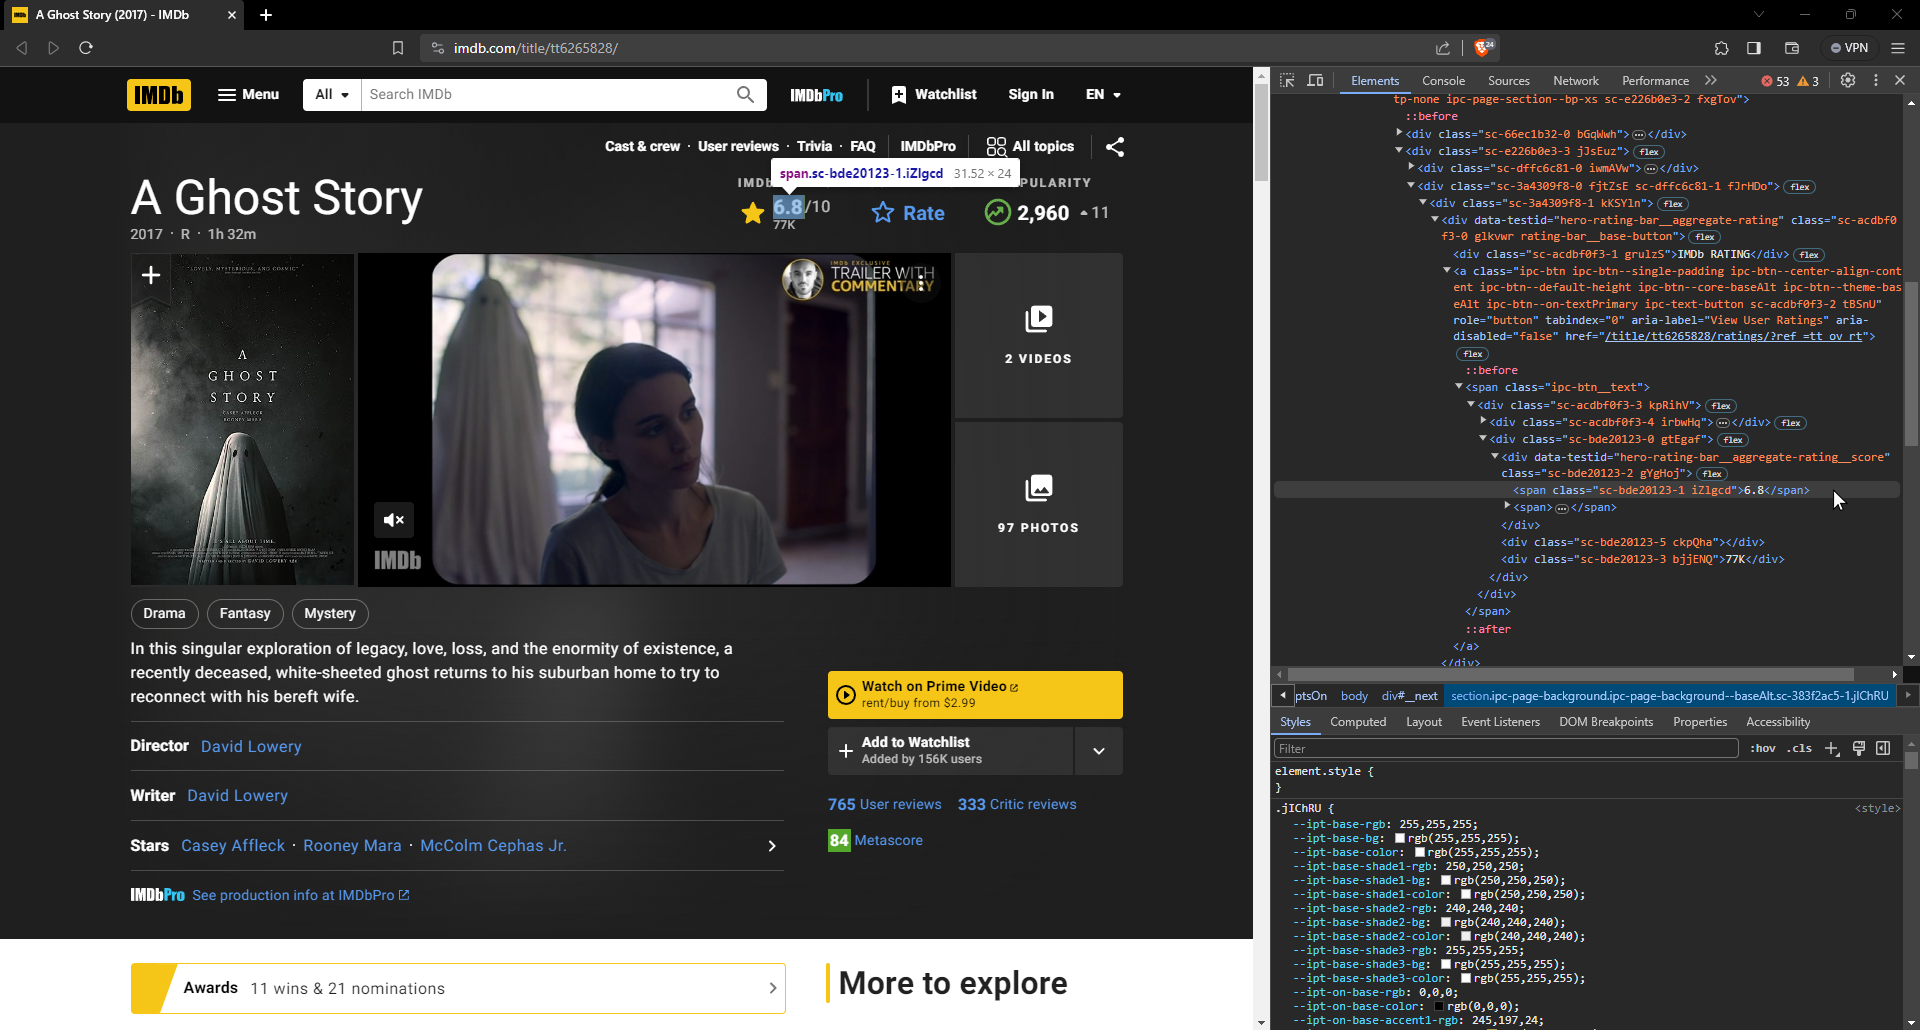

We can now use BeautifulSoup's `find()` function to extract this `span` from the webpage:

In [29]:
# extract the span containing the imdb score
imdb_score_span = soup.find("span", class_="sc-bde20123-1 iZlgcd")

Now that we have extracted the `span` containing the IMDb Score from the webpage, we can extract the clean, formatted data (as it appears on the webpage) using the `.text` field like this:

In [30]:
# extract the imdb score from the span
film_imdb_score = imdb_score_span.text

# Final Results

We have now extracted all 5 of the pieces of data about the film that we needed. Let's print them out:

In [31]:
# print the resulting data about the film
print(f"Title        - {film_title}")
print(f"Release Year - {film_release_year}")
print(f"MPA Rating   - {film_MPA_rating}")
print(f"Runtime      - {film_runtime}")
print(f"IMDb Score   - {film_imdb_score}/10")

Title        - A Ghost Story
Release Year - 2017
MPA Rating   - R
Runtime      - 1h 32m
IMDb Score   - 6.8/10


In this simple example, we have only scraped this data for the purpose of printing it out. However, you can now use these scraping skills to retrieve data from webpages for a countless array of different purposes. Web Scraping is a powerful tool and this is only the beginning!

# Raw Code Example

As stated in the *"About"* section above, here is the raw code example (without accompanying explanations of steps):

In [32]:
import requests
from bs4 import BeautifulSoup


# define the target webpage
url = "https://www.imdb.com/title/tt6265828/"

# define the user-agent string
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246'
}

# perform the scrape on the target url, provide user-agent string
response = requests.get(url, headers=headers)

# ensure the scrape was performed successfully (valid response)
if response.status_code == 200:
    print("The webpage was scraped successfully!\n")
else:
    raise RuntimeError(f"Something may have gone wrong while scraping! The returned status code was: {response.status_code}")

# pass the webpage data into beautifulsoup for parsing
soup = BeautifulSoup(response.text, 'html.parser')

# extract the span containing the film's title
title_span = soup.find("span", class_="sc-afe43def-1 fDTGTb")

# extract the film's title from the span
film_title = title_span.text

# extract the unordered list (ul) containing the film's release year, mpa rating, and runtime from the webpage
raw_ul = soup.find("ul", class_="ipc-inline-list ipc-inline-list--show-dividers sc-afe43def-4 kdXikI baseAlt")

# extract all of the list items (li) from the raw_ul unordered list (ul)
list_items = raw_ul.find_all("li")

# save the desired extracted data into corresponding variables
film_release_year = list_items[0].text
film_MPA_rating = list_items[1].text
film_runtime = list_items[2].text

# extract the span containing the imdb score
imdb_score_span = soup.find("span", class_="sc-bde20123-1 iZlgcd")

# extract the imdb score from the span
film_imdb_score = imdb_score_span.text

# print the resulting data about the film
print(f"Title        - {film_title}")
print(f"Release Year - {film_release_year}")
print(f"MPA Rating   - {film_MPA_rating}")
print(f"Runtime      - {film_runtime}")
print(f"IMDb Score   - {film_imdb_score}/10")

The webpage was scraped successfully!

Title        - A Ghost Story
Release Year - 2017
MPA Rating   - R
Runtime      - 1h 32m
IMDb Score   - 6.8/10
